In [35]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (20, 20)

In [2]:
!ls

 DengAI.ipynb			     dengue_labels_train.csv
'Dengue Data Visualizations.ipynb'  'Just one city.ipynb'
 dengue_features_test.csv	     submission1.csv
 dengue_features_train.csv	     submission_format.csv


In [3]:
X = pd.read_csv('dengue_features_train.csv')
X.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [4]:
Y = pd.read_csv('dengue_labels_train.csv')

In [5]:
san_juan_indexes = X.city == 'sj'
X = X[san_juan_indexes]
Y = Y[san_juan_indexes]

In [6]:
X.shape, Y.shape

((936, 24), (936, 4))

In [7]:
y = Y['total_cases']

In [8]:
X_and_y = pd.concat([X, y], axis=1)
X_and_y.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

## Visualizations

## Correlations

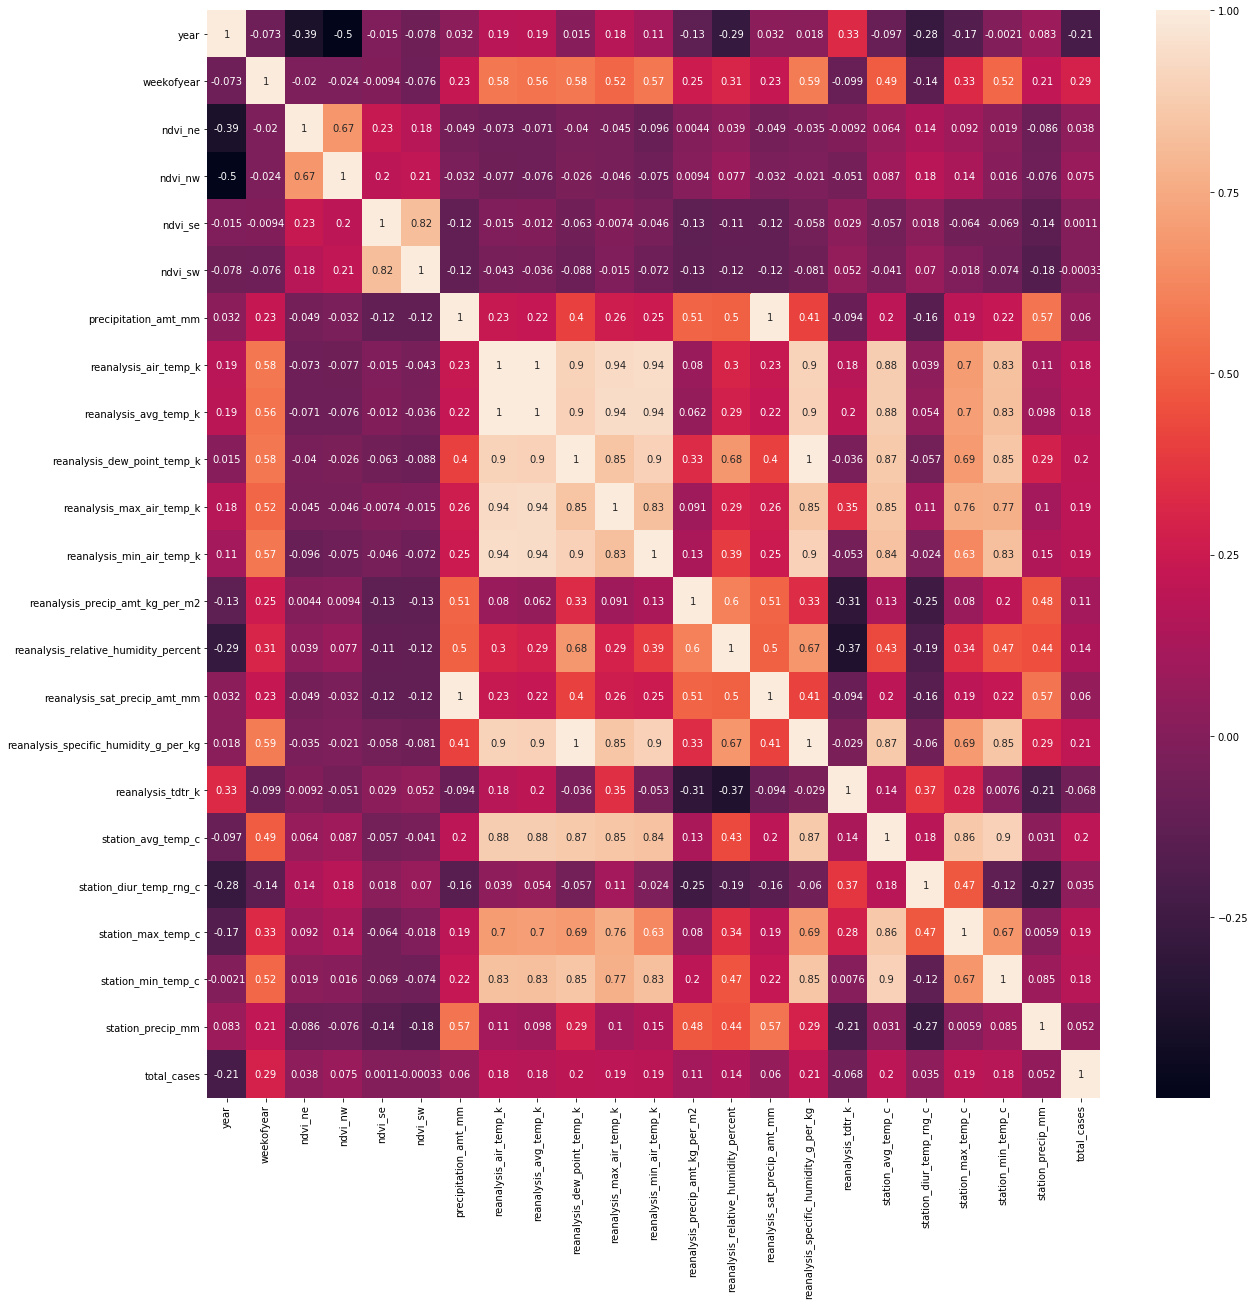

In [52]:
sns.heatmap(X_and_y.corr(), annot=True)

In [43]:
corr = X_and_y.corr()
corr = corr.reset_index()
corr.head()

,index,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,year,1.000000,-0.073143,-0.392312,-0.498367,-0.014863,-0.077928,0.031612,0.185813,0.189696,...,-0.286206,0.031612,0.018129,0.325336,-0.097312,-0.276963,-0.172907,-0.002097,0.082920,-0.212690
1,weekofyear,-0.073143,1.000000,-0.020271,-0.023549,-0.009380,-0.075804,0.231961,0.575381,0.561001,...,0.306771,0.231961,0.585224,-0.099084,0.485038,-0.137093,0.325748,0.520129,0.213336,0.287134
2,ndvi_ne,-0.392312,-0.020271,1.000000,0.673037,0.234049,0.177792,-0.048727,-0.073170,-0.071176,...,0.039138,-0.048727,-0.035235,-0.009248,0.064027,0.142875,0.092365,0.018818,-0.085993,0.037639
3,ndvi_nw,-0.498367,-0.023549,0.673037,1.000000,0.196343,0.214615,-0.032351,-0.077457,-0.076375,...,0.077339,-0.032351,-0.020595,-0.050657,0.087298,0.184124,0.136659,0.016428,-0.076237,0.075307
4,ndvi_se,-0.014863,-0.009380,0.234049,0.196343,1.000000,0.821354,-0.119386,-0.014601,-0.011905,...,-0.114294,-0.119386,-0.058442,0.029358,-0.056545,0.018121,-0.063718,-0.069275,-0.140286,0.001113


In [57]:
corr.isna().sum()

index                                    0
year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
total_cases

In [53]:
melted_corrs = corr.melt(id_vars='index')
melted_corrs.columns = ['var1', 'var2', 'corr']
melted_corrs.sort_values(by='corr', inplace=True, ascending=False)
melted_corrs

,var1,var2,corr
0,year,year,1.000000
288,reanalysis_precip_amt_kg_per_m2,reanalysis_precip_amt_kg_per_m2,1.000000
72,ndvi_nw,ndvi_nw,1.000000
96,ndvi_se,ndvi_se,1.000000
120,ndvi_sw,ndvi_sw,1.000000
144,precipitation_amt_mm,precipitation_amt_mm,1.000000
152,reanalysis_sat_precip_amt_mm,precipitation_amt_mm,1.000000
168,reanalysis_air_temp_k,reanalysis_air_temp_k,1.000000
192,reanalysis_avg_temp_k,reanalysis_avg_temp_k,1.000000
216,reanalysis_dew_point_temp_k,reanalysis_dew_point_temp_k,1.000000


In [54]:
melted_corrs[melted_corrs == 1.0]

,var1,var2,corr
0,NaN,NaN,1.0
288,NaN,NaN,1.0
72,NaN,NaN,1.0
96,NaN,NaN,1.0
120,NaN,NaN,1.0
144,NaN,NaN,1.0
152,NaN,NaN,1.0
168,NaN,NaN,1.0
192,NaN,NaN,1.0
216,NaN,NaN,1.0


## Correlation with total_cases 

In [62]:
total_cases_corr = X_and_y.corr()['total_cases'].reset_index()
total_cases_corr.columns = ['feature', 'corr_with_total_cases']
total_cases_corr.head()

,feature,corr_with_total_cases
0,year,-0.212690
1,weekofyear,0.287134
2,ndvi_ne,0.037639
3,ndvi_nw,0.075307
4,ndvi_se,0.001113


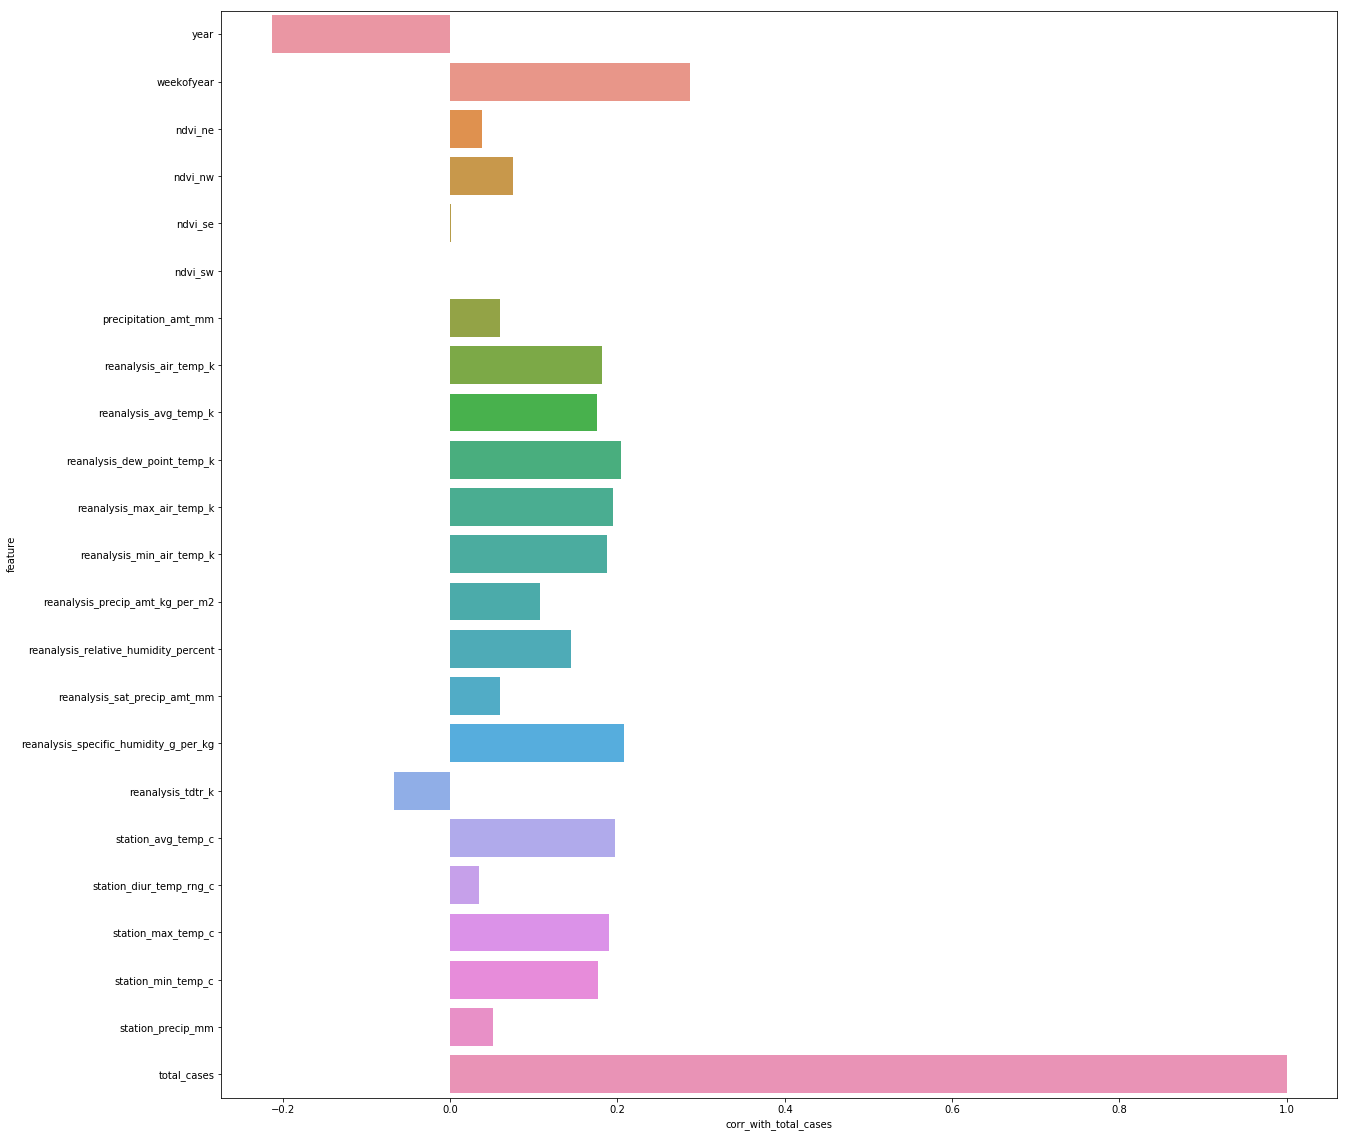

In [69]:
sns.barplot(data=total_cases_corr, y='feature', x='corr_with_total_cases')

## Transformation functions

In [10]:
ndvi_feature_names = list(filter(lambda s: s.startswith(r'ndvi'), list(X.columns)))
reanalysis_feature_names = list(filter(lambda s: s.startswith(r'reanalysis'), list(X.columns)))
station_feature_names = list(filter(lambda s: s.startswith('station'), list(X.columns)))

numerical_features = ndvi_feature_names + reanalysis_feature_names + station_feature_names

In [13]:
def remove_poorly_correlated_features(df):
    return df

In [14]:
def add_historical_values(df):
    historical_data = df[numerical_features].rolling(4).mean().fillna(method="bfill")
    column_rename = lambda name: 'past_' + name
    historical_data.columns = map(column_rename, historical_data.columns)
    return pd.concat([df, historical_data], axis=1)

In [15]:
def fill_missing_values(df):
    new_df = df.fillna(df.mean())
    return new_df

In [16]:
def drop_unwanted_variables(df):
    new_df = df.drop(columns=['city', 'week_start_date'])
    return new_df

In [17]:
def apply_all_transformations(df):
    df1 = add_historical_values(df)
    df2 = fill_missing_values(df1)
    df3 = drop_unwanted_variables(df2)
    return df3

In [18]:
X = apply_all_transformations(X)

In [19]:
from sklearn.model_selection import cross_val_score

## Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=42)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
list(map(lambda x: x.shape, [X_test, X_train, y_test, y_train]))

[(234, 41), (702, 41), (234,), (702,)]

In [22]:
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.6585851908222354

In [25]:
from sklearn.model_selection import KFold, StratifiedKFold
cross_val_score(forest, X, y, cv=6, scoring='neg_mean_absolute_error')

array([-51.41858974, -48.32564103, -29.72115385, -21.71602564,
       -15.98461538, -23.0224359 ])

In [26]:
# %%time
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [5, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 8, 12, None],
    'criterion': ['mse', 'mae']
}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='neg_mean_absolute_error')

In [27]:
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 20], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 8, 12, None], 'criterion': ['mse', 'mae']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [28]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
# tree.score(X_test, y_test)
cross_val_score(tree, X, y, cv=2, scoring='neg_mean_absolute_error')

array([-34.19230769, -55.2457265 ])

In [29]:
cross_val_score(tree, X, y, cv=2, scoring='neg_mean_absolute_error')

array([-34.19230769, -55.2457265 ])

## Lasso Model

In [32]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)
cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_absolute_error')

array([-41.78513949, -38.82971364, -29.89478299, -18.15080531,
       -21.24849358])

In [33]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas=[100, 10, 1], random_state=42)
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=[100, 10, 1], copy_X=True, cv=None, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=42,
    selection='cyclic', tol=0.0001, verbose=False)

In [34]:
lasso_cv.score(X_test, y_test, )

0.1603555043259638